<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/315_Optimization_using_Genetic_Algorithm_Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/dhWfbY2K2mk

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
# Import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Read the heart data csv file and store it in a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/data/heart.data.csv")
df.head()

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [ ]:
# Drop the Unnamed: 0 column from the dataframe
df = df.drop(columns=["Unnamed: 0"])

# Display the number of missing values in each column of the dataframe
df.isna().sum()

biking           0
smoking          0
heart.disease    0
dtype: int64

In [ ]:
# Generate descriptive statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
biking,498.0,37.788411,21.481519,1.119154,20.204598,35.824459,57.852786,74.907111
smoking,498.0,15.435034,8.289959,0.525850,8.279776,15.814614,22.568925,29.946743
heart.disease,498.0,10.174538,4.571874,0.551898,6.513683,10.385255,13.724024,20.453496


In [ ]:
# Compute the pairwise correlation between the columns and the target variable heart.disease
df.corrwith(df["heart.disease"])

biking          -0.935455
smoking          0.309131
heart.disease    1.000000
dtype: float64

In [ ]:
# Split the dataframe into the feature matrix X and the target vector y
X = df.drop(columns=["heart.disease"])
y = df['heart.disease']

# Display the first 5 rows of the feature matrix X
X.head()

,biking,smoking
0,30.801246,10.896608
1,65.129215,2.219563
2,1.959665,17.588331
3,44.800196,2.802559
4,69.428454,15.974505


In [ ]:
# Split the feature matrix X and the target vector y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [ ]:
# Initializing the model
model = RandomForestRegressor(n_estimators=100, max_depth=100)

# Fitting the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100)

RMSE:  0.7123326555505946


Text(0, 0.5, 'Predicted')

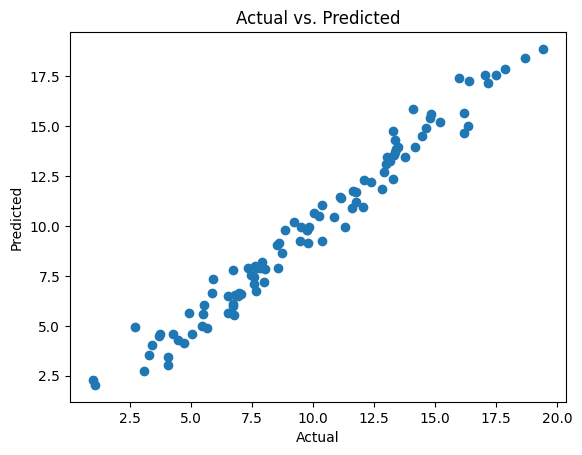

In [ ]:
# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# Plotting a scatter plot to compare actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0.5, 1.0, 'Feature Importance')

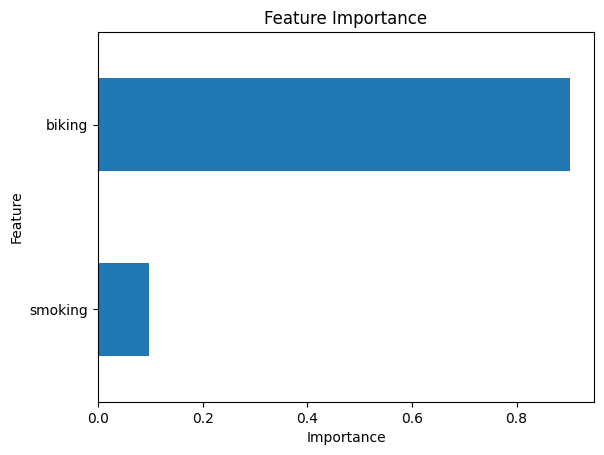

In [ ]:
# Getting feature names from training data
features = X_train.columns

# Extracting importances from model
importances = model.feature_importances_

# Creating a series with feature names and importances
feat_imp = pd.Series(importances, index=features)

# Plotting the 10 most important features
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [ ]:
#Now that we are satisfied with our model, we can define a new model object,
#which we will train on the full data set:"""
model_full= RandomForestRegressor(n_estimators=100, max_depth=100,
random_state =42)
model_full.fit(X, y)

RandomForestRegressor(max_depth=100, random_state=42)

The model_full object has a predict method that will serve as the function we will optimize, also called the objective function.
The goal of our optimization task is to find the values for each of the inputs that optimize the cement strength.

In [ ]:
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand
import math

In [ ]:
def obj_fun(X):
    """
    This function takes a list X as input and returns the negative result of
    model.predict.


    Parameters:
    X (list): A list of values.

    Returns:
    float: The negative of the prediction result from the full model.
    """

    # Converting X into a list of lists to make it compatible for model prediction
    X = [X]

    # Getting the prediction result from the full model
    results = model_full.predict(X)

    # Returning the negative of the prediction result
    return -results

In [ ]:

def decode(bounds, n_bits, bitstring):
    """
    Decode binary bitstring to numbers for each input and scale the value to fall within the defined bounds.

    Parameters:
    bounds (list): A list of tuples that define the lower and upper bounds for each decoded value.
    n_bits (int): The number of bits used to represent each decoded value.
    bitstring (str): A binary string to be decoded.

    Returns:
    list: A list of decoded and scaled values.
    """
    decoded = list()  # Create empty list to hold the decoded values
    largest = 2**n_bits  # Largest value - for 16 bit this would be 65536
    for i in range(len(bounds)):
        # extract the substring
        start, end = i * n_bits, (i * n_bits) + n_bits  # Define start and end indices corresponding to each substring
        substring = bitstring[start:end]  # Extract the substring corresponding to each value
        # convert bitstring to a string of chars
        chars = ''.join([str(s) for s in substring])  # Join all values in the substring together, into chars from a list
        # convert string to integer
        integer = int(chars, 2)  # Convert a base-2 binary number string into an int
        # scale integer to desired range
        value = bounds[i][0] + (integer / largest) * (bounds[i][1] - bounds[i][0])  # Scale to a value between our defined bounds
        # store
        decoded.append(value)
    return decoded

In [ ]:
"""
The following code implements three functions that are part of a genetic algorithm: tournament selection, crossover, and mutation.

The selection function selects a candidate from the population for further processing, based on their score.
The crossover function takes two parent candidates and creates two children from them. It has a crossover rate parameter that determines the likelihood of recombination.
The mutation function mutates a candidate string, flipping bits with a certain probability determined by the mutation rate.
"""

def selection(pop, scores, k=3):
    """
    Select the best individuals for the next generation based on their fitness (scores).
    This function randomly selects k individuals from the population and performs a tournament
    among them to choose the one with the best score.

    Parameters:
    pop (list): The population of individuals.
    scores (list): The fitness scores for each individual in the population.
    k (int, optional): The number of individuals to select from the population for the tournament.
                        Defaults to 3.

    Returns:
    individual: The best individual from the tournament.
    """
    # Randomly select one index from the population as the initial selection
    selection_ix = randint(len(pop))
    # Perform a tournament among k randomly selected individuals
    for ix in randint(0, len(pop), k-1):
        # Check if the current individual has a better score than the selected one
        if scores[ix] < scores[selection_ix]:
            # Update the selected individual if a better one is found
            selection_ix = ix
    # Return the best individual from the tournament
    return pop[selection_ix]

def crossover(p1, p2, r_cross):
    """
    Create two children from two parents using the crossover operation.
    The children are created by copying the parents, and recombination occurs
    if a random value is less than the crossover rate.

    Parameters:
    p1 (list): The first parent.
    p2 (list): The second parent.
    r_cross (float): The crossover rate.

    Returns:
    list: A list containing the two children.
    """
    # Children are copies of the parents by default
    c1, c2 = p1.copy(), p2.copy()
    # Check if recombination should occur
    if rand() < r_cross:
        # Select a crossover point (not at the end of the string)
        pt = randint(1, len(p1)-2)
        # Perform crossover in the children
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    # Return the two children
    return [c1, c2]


import random

def mutation(bitstring, r_mut):
    """
    The mutation process changes the value of some features in the offspring at random to maintain the diversity in the population.
    A standard value for the mutation rate is 1/m where m is the number of features.

    Parameters:
    bitstring (list): A list of binary values representing the offspring
    r_mut (float): The mutation rate, typically 1/m where m is the number of features

    Returns:
    list: The modified bitstring after mutation

    """
    rand = random.random
    for i in range(len(bitstring)):
        # Check for a mutation
        if rand() < r_mut:
            # Flip the bit
            bitstring[i] = 1 - bitstring[i]
    return bitstring


In [ ]:
### Putting all together into our Genetic algorithm that runs until it finds the best
#The whole fitness assignment, selection, recombination, and mutation process is
#repeated until a stopping criterion is satisfied.
#Each generation is likely to be more adapted to the environment than the old one.

# genetic algorithm implementation
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    """
    The genetic algorithm that finds the optimal solution by performing the fitness assignment, selection, recombination, and mutation process repeatedly.
    Each iteration, the solution is more adapted to the environment.

    Parameters
    ----------
    objective: function
        The objective function that needs to be optimized.
    bounds: list of tuples
        The bounds of the solution.
    n_bits: int
        The number of bits used to encode the solution.
    n_iter: int
        The number of iterations to perform.
    n_pop: int
        The size of the population.
    r_cross: float
        The crossover rate.
    r_mut: float
        The mutation rate.

    Returns
    -------
    list
        The best solution and its evaluation.
    """
    # initialize the population with random bitstrings
    pop = [randint(0, 2, n_bits * len(bounds)).tolist() for _ in range(n_pop)]

    # track the best solution found so far
    best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))

    # iterate over generations
    for gen in range(n_iter):
        # decode the population
        decoded = [decode(bounds, n_bits, p) for p in pop]
        # evaluate all candidates in the population
        scores = [objective(d) for d in decoded]
        # check for a new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))

        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]

        # create the next generation - children
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i + 1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace the population
        pop = children
    return [best, best_eval]

In [ ]:
# define range for input
bounds = [[df['biking'].min(), df['biking'].max()], [df['smoking'].min(), df['smoking'].max()]]
# define the total iterations
n_iter = 10
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))
# perform the genetic algorithm search
best, score = genetic_algorithm(obj_fun, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

>0, new best f([50.22142736012424, 9.646255030759077]) = -6.457817
>0, new best f([60.04165682473733, 19.986395277147537]) = -6.570027
>0, new best f([11.0699897113062, 9.193736411023934]) = -14.430621
>0, new best f([12.67554431077172, 27.391898403289332]) = -17.574670
>0, new best f([2.305868391362577, 21.753372744684764]) = -17.768389
>0, new best f([4.01500715853555, 22.548422819636095]) = -18.355775
>0, new best f([3.8371126096466632, 27.84621273183295]) = -19.195870


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

>1, new best f([4.0172589882683205, 29.33530426125901]) = -19.327751


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

>2, new best f([2.2045360533878946, 29.92923494966139]) = -19.540276


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

>3, new best f([1.916301847593243, 29.920256405619025]) = -19.688918
>3, new best f([1.411891987452603, 29.389175525513195]) = -20.059371


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

>4, new best f([1.3398334360039401, 29.930581731267743]) = -20.108543


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

>5, new best f([1.3398334360039401, 29.638330122688796]) = -20.113012


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

>7, new best f([1.3420852657367108, 28.78581736586634]) = -20.134052


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

>8, new best f([1.3510925846677937, 28.542947749520394]) = -20.138276


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [ ]:
decoded = decode(bounds, n_bits, best)
print('The result is (%s) with a score of %f' % (decoded, score*-1))

The result is ([1.3510925846677937, 28.542947749520394]) with a score of 20.138276


#Using a ready-to-use python library for genetic algorithm
<br>
https://github.com/rmsolgi/geneticalgorithm https://pypi.org/project/geneticalgorithm/
<br>
"""

In [ ]:
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15094 sha256=1f0c5f22674f419a98b64cf53381035af449d71dee0956cdb7902996cf777bf8
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [ ]:
# Import the geneticalgorithm module and assign an alias to it
from geneticalgorithm import geneticalgorithm as ga

# Define the objective function
def obj_fun(X):
    """
    This function is used as an objective function to be minimized by the genetic algorithm.
    It calculates the prediction results from a given input X and returns the negative results.

    Parameters:
    X (list): Input variables

    Returns:
    float: Negative prediction results
    """
    X = [X]
    # Calculate the prediction results from a given model
    results = model_full.predict(X)

    # Return the negative results
    return -results

In [ ]:
# Define the boundaries for the input variables
boundaries = np.array([[df['biking'].min(), df['biking'].max()],
[df['smoking'].min(), df['smoking'].max()]])

# Display the boundaries
boundaries

array([[ 1.11915412, 74.90711081],
       [ 0.52584999, 29.94674311]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||_____________________________________________ 10.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||________________________________________ 20.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||___________________________________ 30.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||______________________________ 40.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||_________________________ 50.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||||||||||||____________________ 60.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||_______________ 70.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||||||||||||||||||||||__________ 80.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||||||||||||_____ 90.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

 The best solution found:
 [ 1.20732863 29.36972394]

 Objective function:
 -20.113011891735997


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

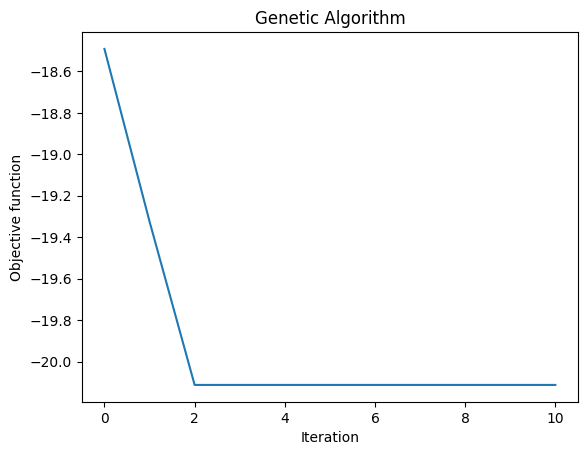

In [ ]:
# Define the algorithm parameters
algorithm_param = {'max_num_iteration': 10,\
                   'population_size':100,\
                   'mutation_probability':0.01,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.9,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

# Create a genetic algorithm model using the specified parameters
ga_model=ga(function=obj_fun, dimension=2,variable_type='real',variable_boundaries=boundaries, algorithm_parameters=algorithm_param)

# Run the genetic algorithm
ga_model.run()


In [ ]:
# Store the output results in a dictionary
result = ga_model.output_dict

# Display the results
print("Results: ")
print('Biking:', result['variable'][0])
print('Smoking:', result['variable'][1])
print("Max Heart Prob: ", -result['function'])

Results: 
Biking: 1.2073286324928723
Smoking: 29.369723935994145
Max Heart Prob:  20.113011891735997
